In [6]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap

In [7]:
plt.style.use('seaborn-paper')
plt.rcParams['figure.figsize'] = [1.7, 1.7]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size'] = 8
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 7.5
plt.rcParams['xtick.labelsize'] = 7.5
plt.rcParams['ytick.labelsize'] = 7.5
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handlelength'] = 1.
plt.rcParams['legend.handletextpad'] = .5
plt.rcParams['legend.borderaxespad'] = .25

In [8]:
ds_weighted = xr.open_zarr('linear_c3a_results_zarr')
ds_regular = xr.open_zarr('final_data_zarr')
ds_log = xr.open_zarr('log_c3a_results_zarr')

In [9]:
ds_merged = xr.combine_nested([ds_weighted.sel(alg='c3a_weighted').expand_dims('alg'), ds_regular, ds_log.sel(alg='c3a_log_weighted').expand_dims('alg')], concat_dim='alg')

In [10]:
ds_merged = ds_merged.sel(ax=-1, aya=-1, ayb=-1)
ds_merged

,Array,Chunk
Bytes,2.58 MiB,18.00 kiB
Shape,"(4, 7, 7, 3, 3, 3, 4, 4, 4, 1)","(2, 1, 1, 2, 3, 3, 4, 4, 4, 1)"
Count,4773 Tasks,294 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,5.17 MiB,24.00 kiB
Shape,"(4, 3, 3, 3, 4, 4, 4, 1, 7, 7, 2)","(2, 2, 2, 3, 4, 4, 4, 1, 1, 1, 2)"
Count,17127 Tasks,588 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [11]:
xr.concat([ds_weighted.sel(alg='c3a_weighted'), ds_log.sel(alg='c3a_log_weighted')], dim='alg')

,Array,Chunk
Bytes,110.25 kiB,576 B
Shape,"(2, 7, 7, 2, 3, 3, 2, 2, 2, 1)","(1, 1, 1, 1, 3, 3, 2, 2, 2, 1)"
Count,590 Tasks,196 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,220.50 kiB,1.12 kiB
Shape,"(2, 2, 3, 3, 2, 2, 2, 1, 7, 7, 2)","(1, 1, 3, 3, 2, 2, 2, 1, 1, 1, 2)"
Count,786 Tasks,196 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


/var/folders/7_/rg8g9_5d69l48grf06yfx1vm0000gn/T/ipykernel_14157/2344047832.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


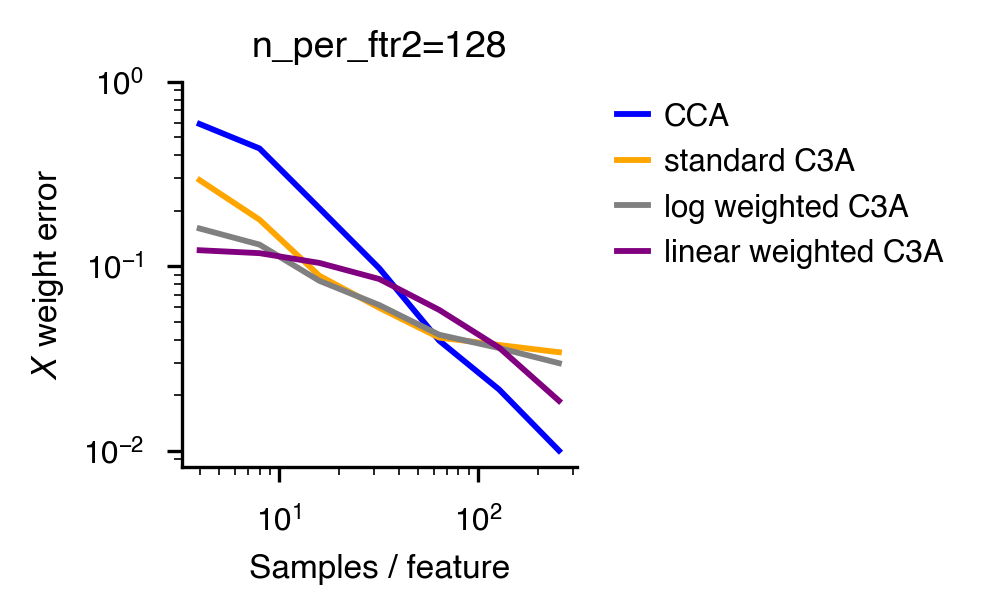

In [12]:
n = 128
r=.3
exa = .9

fig, axs = plt.subplots(1, 1, squeeze=False)

ax = axs[0, 0]
c3a_vs_cca = ds_merged.cmntrth_weight_error.sel(mix_component=-1, modality='x', exa_mix=exa, n_per_ftr2=n, px=16, pya=16, pyb=16, rxb=r, rxa=r)
ax.loglog(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(alg='cca'), label='CCA', color='b')
ax.plot(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(alg='c3a'), label='standard C3A', color='orange')
ax.plot(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(alg='c3a_log_weighted'), label='log weighted C3A', color='gray')
ax.plot(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(alg='c3a_weighted'), label="linear weighted C3A", color='purple')
ax.legend()
ax.set_ylim(None, 1)
ax.set_xlabel('Samples / feature')
ax.set_ylabel('$X$ weight error')
ax.set_title(f'n_per_ftr2={n}')
ax.legend(bbox_to_anchor=(1.05, 1))

fig.tight_layout()

/var/folders/7_/rg8g9_5d69l48grf06yfx1vm0000gn/T/ipykernel_14157/3402772340.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


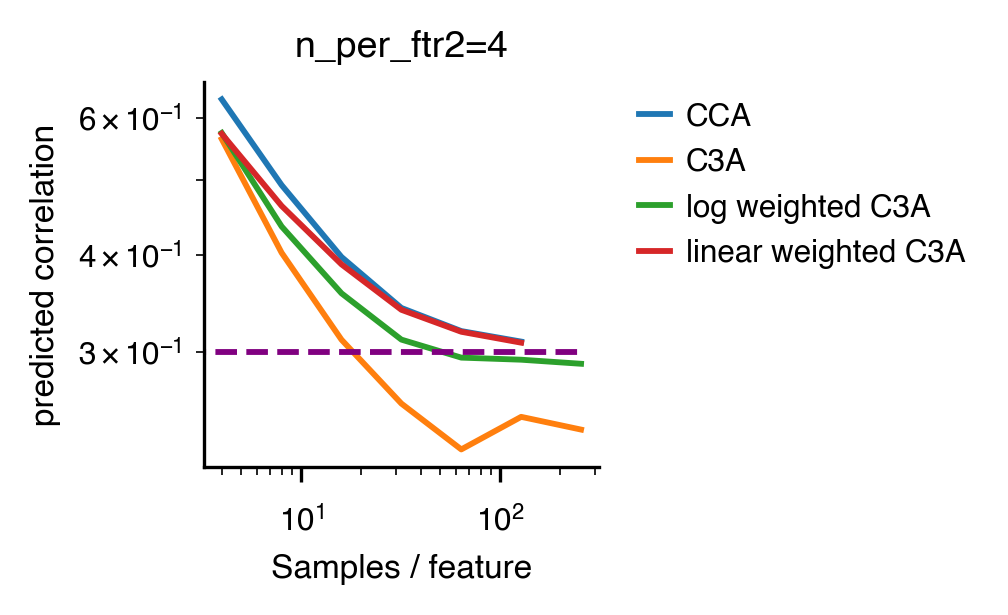

In [13]:
n = 4
r = .3
exa = .9
c3a_linear = ds_weighted.corrs.sel(mix_component=-1, exa_mix=exa, n_per_ftr2=n, px=16, pya=16, pyb=16, rxb=r, rxa=r)
c3a_log = ds_log.corrs.sel(mix_component=-1, exa_mix=exa, n_per_ftr2=n, px=16, pya=16, pyb=16, rxb=r, rxa=r)
c3a_vs_cca = ds_regular.corrs.sel(mix_component=-1, exa_mix=exa, n_per_ftr2=n, px=16, pya=16, pyb=16, rxb=r, rxa=r, ax=-1, aya=-1, ayb=-1)
fig, axs = plt.subplots(1, 1, squeeze=False)

ax = axs[0, 0]

ax.loglog(c3a_linear.n_per_ftr1, c3a_linear.sel(alg='cca'), label='CCA')
ax.plot(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(alg='c3a'), label='C3A')
ax.plot(c3a_log.n_per_ftr1, c3a_log.sel(alg='c3a_log_weighted'), label='log weighted C3A')
ax.plot(c3a_linear.n_per_ftr1, c3a_linear.sel(alg='c3a_weighted'), label="linear weighted C3A")
ax.hlines(y=.3, xmin=0, xmax=256, linestyle='--', color='purple')
ax.legend()
#ax.set_ylim(None, 1)
ax.set_xlabel('Samples / feature')
ax.set_ylabel('predicted correlation')
ax.legend(bbox_to_anchor=(1.05, 1))
ax.set_title(f'n_per_ftr2={n}')

fig.tight_layout()

/var/folders/7_/rg8g9_5d69l48grf06yfx1vm0000gn/T/ipykernel_14157/410007450.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


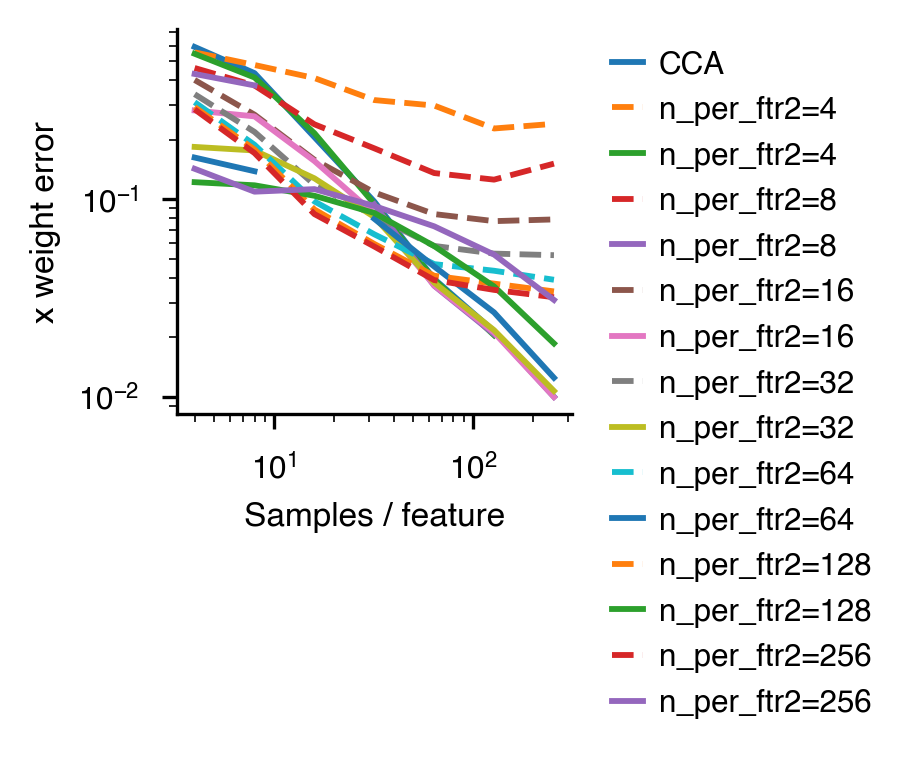

In [14]:
#plot linear weighted c3a by itself
r=.3
exa=.9
fig, axs = plt.subplots(1, 1, squeeze=False)

ax = axs[0, 0]
c3a_vs_cca = ds_regular.cmntrth_weight_error.sel(mix_component=-1, modality='x', exa_mix=exa, px=16, pya=16, pyb=16, rxb=r, rxa=r, ax=-1, aya=-1, ayb=-1)
ax.loglog(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(alg='cca', n_per_ftr2=32), label='CCA')
ds_linear_weighted = ds_weighted.cmntrth_weight_error.sel(alg='c3a_weighted', mix_component=-1, modality='x', exa_mix=exa, px=16, pya=16, pyb=16, rxb=r, rxa=r)
for n in ds_linear_weighted.n_per_ftr2.values:
    ax.plot(c3a_vs_cca.n_per_ftr1, c3a_vs_cca.sel(n_per_ftr2=n, alg='c3a'), label="n_per_ftr2={}".format(n), linestyle='--')
    ax.plot(ds_linear_weighted.n_per_ftr1, ds_linear_weighted.sel(n_per_ftr2=n), label="n_per_ftr2={}".format(n))

ax.legend()
#ax.set_ylim(None, 1)
ax.set_xlabel('Samples / feature')
ax.set_ylabel('x weight error')
ax.legend(bbox_to_anchor=(1.05, 1))


fig.tight_layout()

/Users/ninabernick/Documents/research/cca_data_analysis/plotting.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


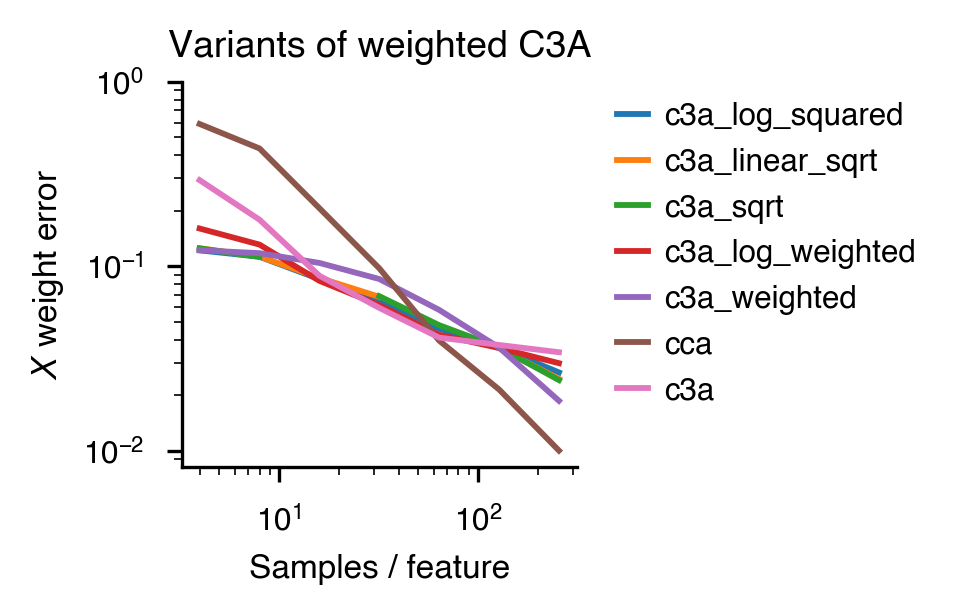

In [15]:
import plotting
total_dataset = xr.open_zarr('weighted_c3a_results_zarr')
exa = .9
r = .3
n_per_ftr2 = 128
cca_data = ds_regular.cmntrth_weight_error.sel(mix_component=-1, modality='x', exa_mix=exa, px=16, pya=16, pyb=16, rxb=r, rxa=r, n_per_ftr2=n_per_ftr2, ax=-1, aya=-1, ayb=-1)
data = total_dataset.cmntrth_weight_error.sel(mix_component=-1, modality='x', exa_mix=exa, px=16, pya=16, pyb=16, rxb=r, rxa=r, n_per_ftr2=n_per_ftr2)
fig, ax = plotting.plot_algs([data, cca_data], '$X$ weight error', 'Variants of weighted C3A')
#ax.plot(cca_data.n_per_ftr1, cca_data, label="CCA")

In [16]:
total_dataset = xr.concat([total_dataset, ds_regular], dim='alg')

In [17]:
total_dataset

,Array,Chunk
Bytes,36.18 MiB,36.00 kiB
Shape,"(7, 7, 7, 3, 3, 3, 4, 4, 4, 1, 2, 2, 2)","(2, 1, 1, 1, 3, 3, 4, 4, 4, 1, 1, 2, 2)"
Count,16719 Tasks,1764 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,72.35 MiB,16.00 kiB
Shape,"(7, 3, 3, 3, 4, 4, 4, 1, 7, 7, 2, 2, 2, 2)","(2, 2, 2, 2, 4, 4, 2, 1, 1, 2, 2, 1, 1, 1)"
Count,70482 Tasks,21504 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [18]:
import plotting
import numpy as np
x_ds = total_dataset.n_per_ftr1
y_ds = total_dataset.cmntrth_weight_error.sel(mix_component=-1, modality='x', px=16, pya=16, pyb=16, rxb=.3, rxa=.3, exa_mix=.9, ax=-1, aya=-1, ayb=-1)
#data = plotting.get_interpolation_matrix(x_ds, y_ds, 'cmntrth_weight_error', 'n_per_ftr2', 'alg')
data = np.empty((len(y_ds['n_per_ftr2'].values),len(y_ds['alg'].values)), float)
for index, value in enumerate(y_ds['n_per_ftr2'].values):
    y_sel = y_ds.sel({'n_per_ftr2': value})
    #print(y_sel.sel(alg='cca').values)
    #print(y_sel.sel(alg='c3a_sqrt').values)
    #delta_y= y_sel.sel(alg='cca').values - y_sel.sel(alg='c3a_sqrt').values
    #print(delta_y)
    required_n = plotting.interpolate_zeros_over_parameter(x_ds, y_sel, 'alg')
    #print(required_n)
    data[index] = required_n
data


ValueError: could not broadcast input array from shape (6,) into shape (7,)

In [ ]:
y_ds.sel(n_per_ftr2=8, alg='c3a_weighted').interpolate_na(dim='n_per_ftr1', allow_rechunk=True)

ValueError: dimension n_per_ftr1 on 0th function argument to apply_ufunc with dask='parallelized' consists of multiple chunks, but is also a core dimension. To fix, either rechunk into a single dask array chunk along this dimension, i.e., ``.chunk(dict(n_per_ftr1=-1))``, or pass ``allow_rechunk=True`` in ``dask_gufunc_kwargs`` but beware that this may significantly increase memory usage.

NameError: name 'data' is not defined

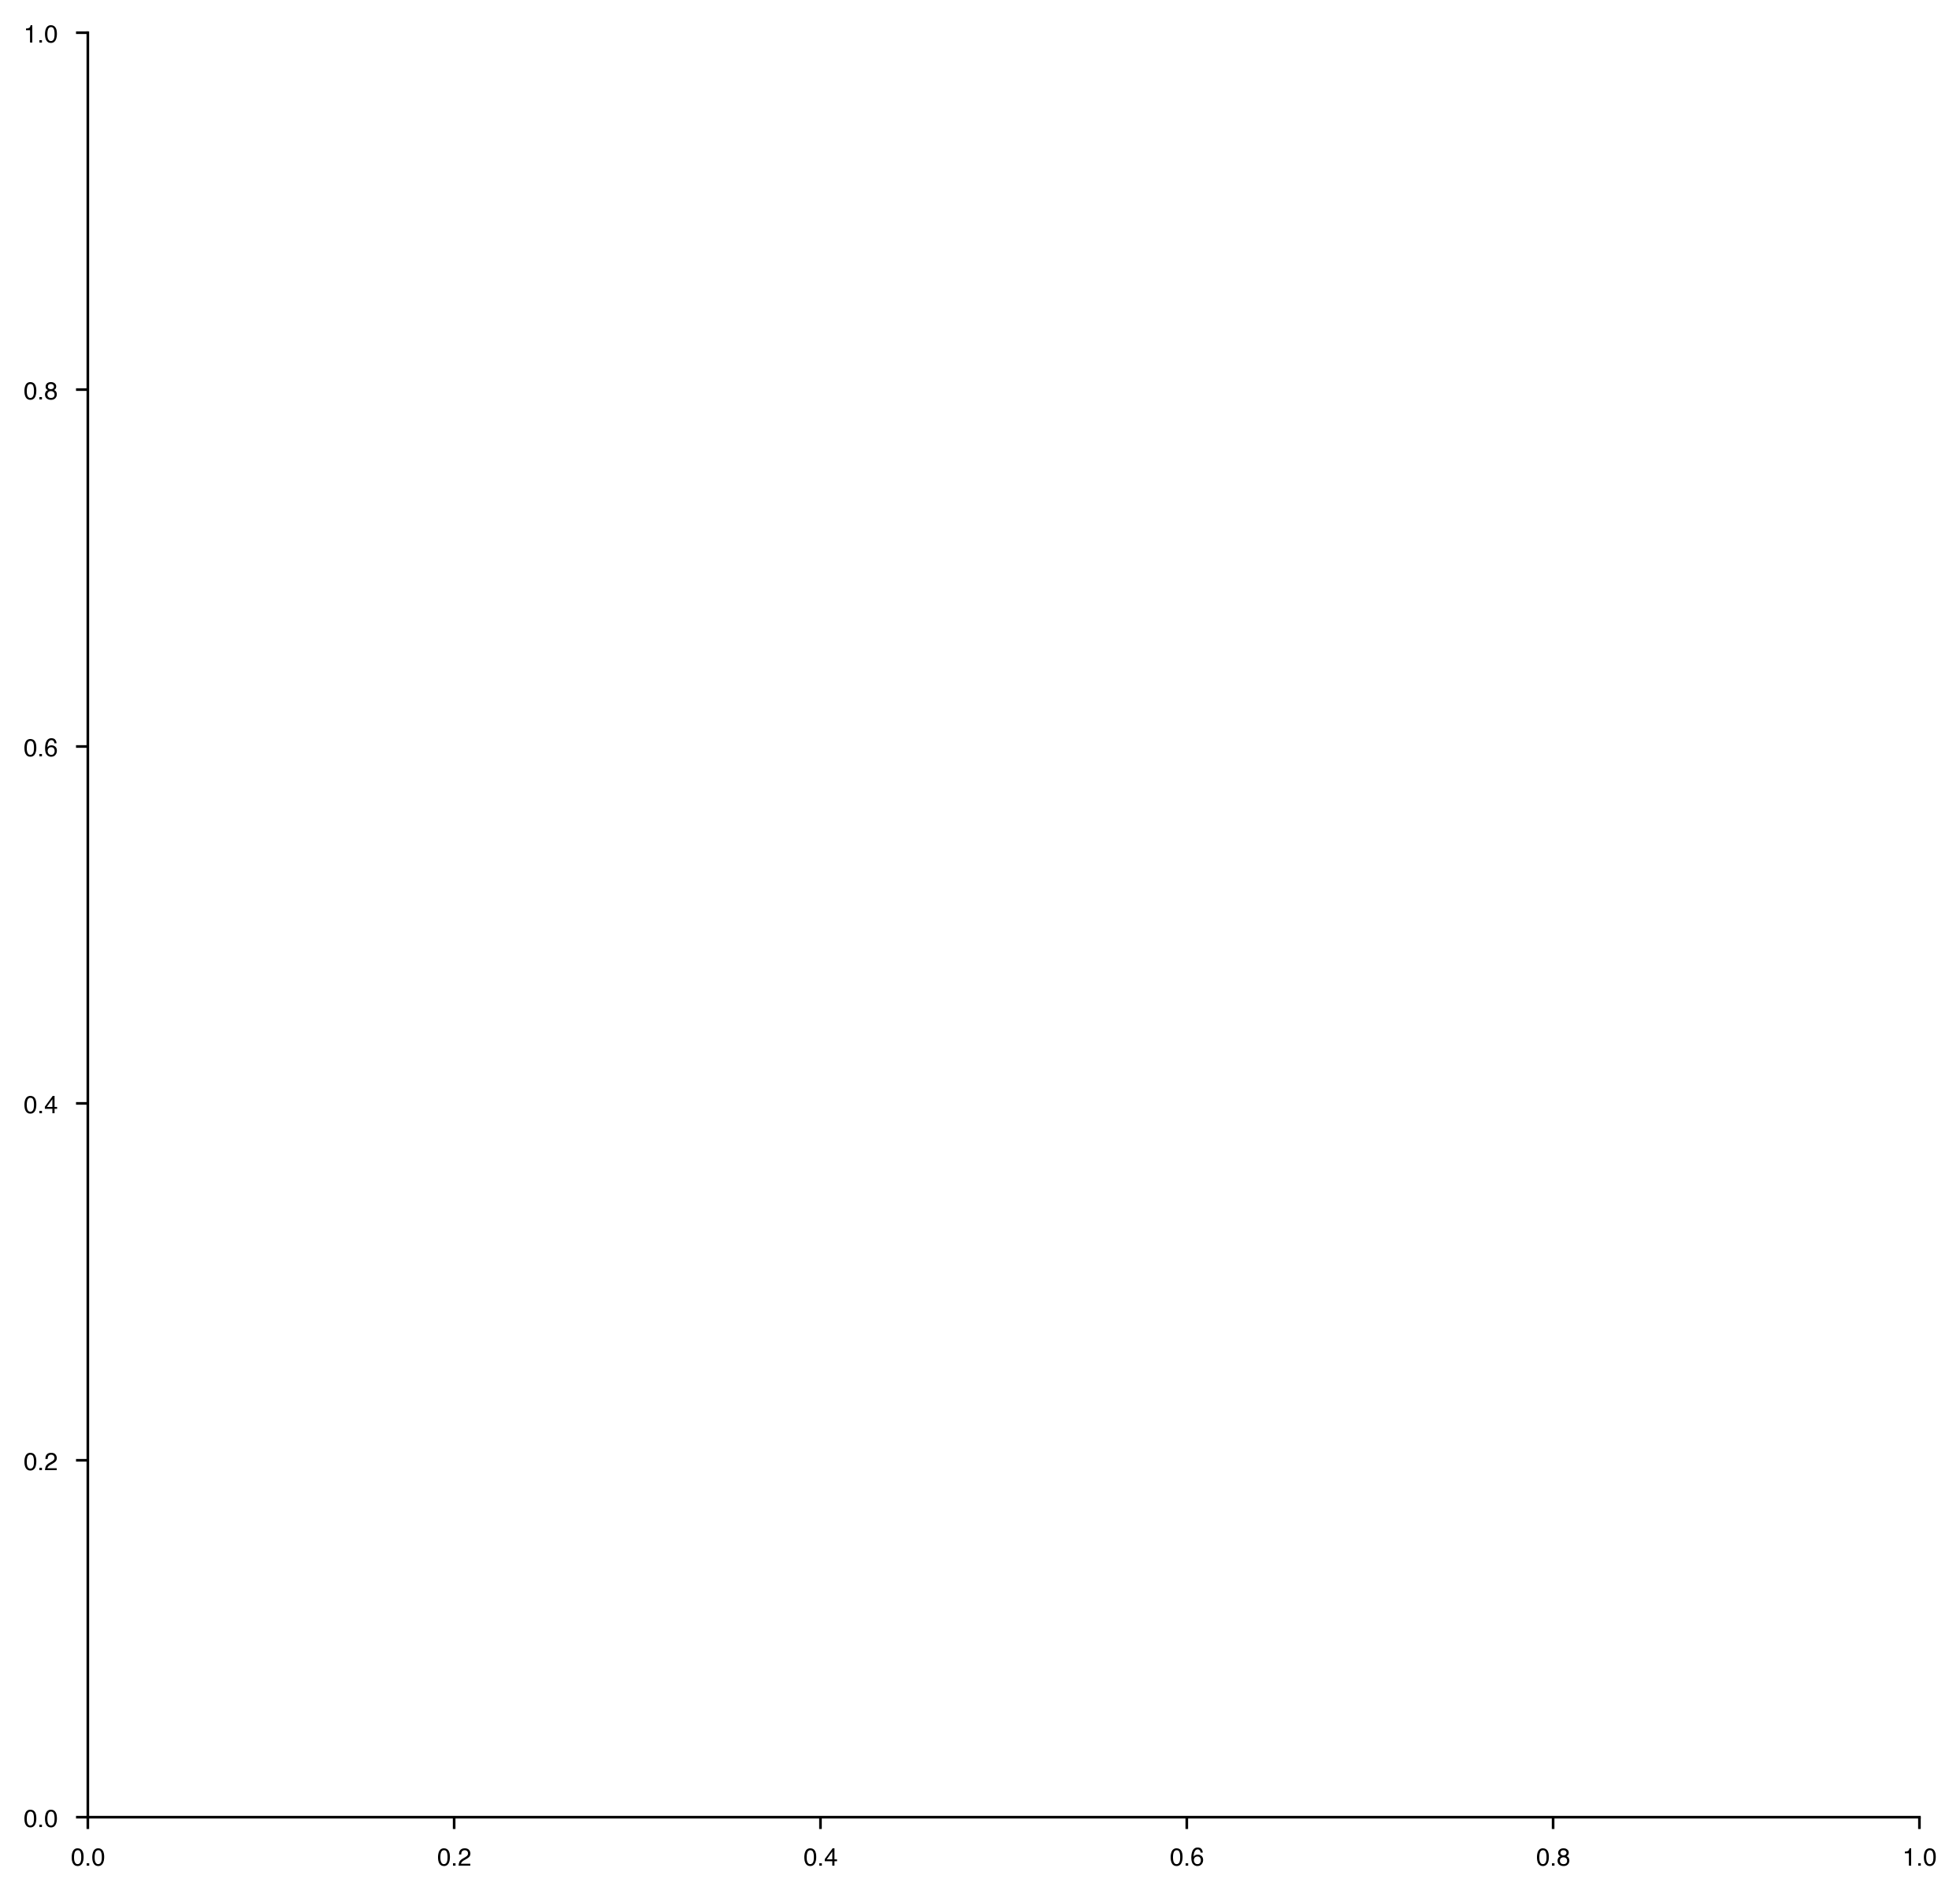

In [5]:
import plotting
from importlib import reload 
reload(plotting)
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = plotting.heatmap(data,y_ds.n_per_ftr2.values, y_ds.alg.values,ax=ax,
                   cmap="YlGn", cbar_kw={'shrink': 0.5}, cbarlabel="required samples/feature for primary data set")

texts = plotting.annotate_heatmap(im, valfmt="{x:.1f}", fontsize="x-small", color="black")
ax.set_xlabel("\n".join(wrap('weighted algorithm', 20)))
ax.set_ylabel("\n".join(wrap('Samples / feature for additional data set', 20)))
ax.set_title("\n".join(wrap('Maximum sample size for which C3A outperforms CCA by weighting algorithm', 40)))
#fig.tight_layout()
plt.savefig("exa_mix_heatmap.png", bbox_inches='tight')
plt.show()